# Collaborated with Harsh Manhas

In [122]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
sns.set()
import pylab
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from IPython.display import Image
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import f1_score as f1
from sklearn import tree
from sklearn.linear_model import LogisticRegression


In [2]:
df=pd.read_csv('C:/Users/yashw/Downloads/diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
a=df.iloc[np.where(df['Glucose']>125 )]

In [7]:
a.iloc[np.where(a['Outcome']==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
12,10,139,80,0,0,27.1,1.441,57,0
20,3,126,88,41,235,39.3,0.704,27,0
28,13,145,82,19,110,22.2,0.245,57,0
36,11,138,76,0,0,33.2,0.420,35,0
40,3,180,64,25,70,34.0,0.271,26,0
...,...,...,...,...,...,...,...,...,...
727,0,141,84,26,0,32.4,0.433,22,0
728,2,175,88,0,0,22.9,0.326,22,0
736,0,126,86,27,120,27.4,0.515,21,0
744,13,153,88,37,140,40.6,1.174,39,0


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df['BMI']

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

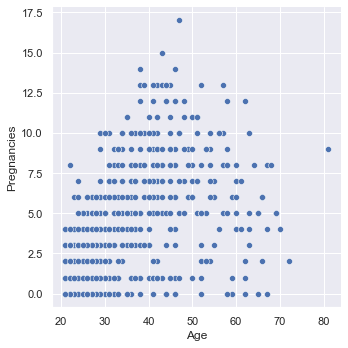

In [10]:
sns.relplot(x='Age',y='Pregnancies',data=df)

In [11]:
s=df.groupby(['BMI'])['SkinThickness'].max()


In [12]:
s=pd.DataFrame(s)

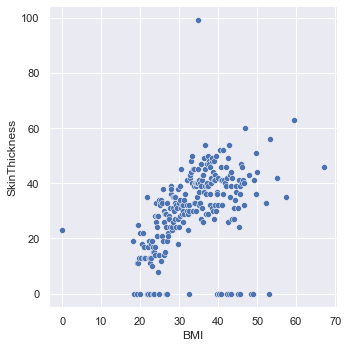

In [13]:
# Insight 1
sns.relplot(kind='scatter',x='BMI',y='SkinThickness',data=s)

In [14]:
x=df.groupby(['Age'])['Pregnancies'].max()
x=x.sort_values()

In [15]:
x=x.tail(27)
x=x.sort_values()
x=pd.DataFrame(x)



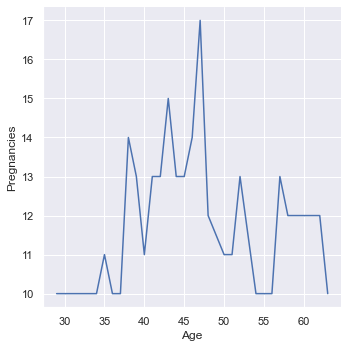

In [16]:
# Insight 2
sns.relplot(kind='line',x='Age',y='Pregnancies',data=x)

In [17]:
# Insight 3
q=df.iloc[np.where(df['Age']<30)]
q.iloc[np.where(q['Outcome']==1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,3,78,50,32,88,31.0,0.248,26,1
23,9,119,80,35,0,29.0,0.263,29,1
31,3,158,76,36,245,31.6,0.851,28,1
38,2,90,68,42,0,38.2,0.503,27,1
45,0,180,66,39,0,42.0,1.893,25,1
...,...,...,...,...,...,...,...,...,...
731,8,120,86,0,0,28.4,0.259,22,1
732,2,174,88,37,120,44.5,0.646,24,1
746,1,147,94,41,0,49.3,0.358,27,1
750,4,136,70,0,0,31.2,1.182,22,1


In [18]:
# Insight 4
print(df.groupby(['Outcome'])['Age'].min())
df.groupby(['Outcome'])['Age'].max()
#  by above information we can see that female of minimum age which is 21 is suffering from 
#  Diabetes in such a young age..
#  Maybe we can Spread awareness in youngsters by advertisment or through campaigns on how we 
#  can reduce the chances of suffering from Diabetes.

Outcome
0    21
1    21
Name: Age, dtype: int64


Outcome
0    81
1    70
Name: Age, dtype: int64

In [19]:
# Insight 5
# maximum pregnancies with age
df.iloc[np.where(df['Pregnancies']==17)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
159,17,163,72,41,114,40.9,0.817,47,1


In [20]:
df['Pregnancies'].max()

17

In [21]:
sd=df.iloc[np.where(df['Outcome']==1)]
sd=sd.iloc[np.where((sd['BloodPressure']>80)&(sd['BloodPressure']<120))]

In [22]:
sd=pd.DataFrame(sd)

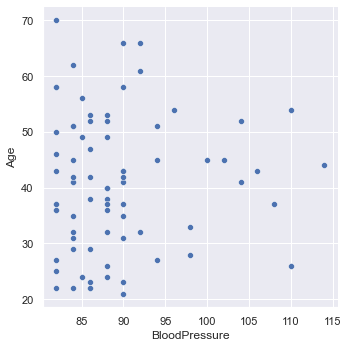

In [23]:
# insight 6
sns.relplot(x='BloodPressure',y='Age',data=sd)# Of Diabetes Patients

In [24]:
def condition(x):
    if x<18.5:
        return "UnderWeight"
    elif x>=18.5 and x<=24.9:
        return "NormalWeight"
    elif(x>=25 and x<=29.9):
        return 'OverWeight'
    else:
        return 'Obese'
  
df['WeightType']=df['BMI'].apply(condition) 

In [25]:
# Insight 7
df['WeightType'].value_counts()

Obese           472
OverWeight      179
NormalWeight    102
UnderWeight      15
Name: WeightType, dtype: int64

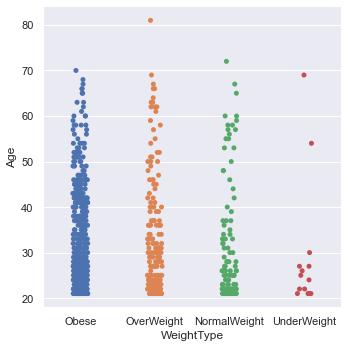

In [26]:
# insight 8
sns.catplot(x='WeightType',y='Age',data=df)
# Most of Diabetic Patients are Obese and then OverWeight

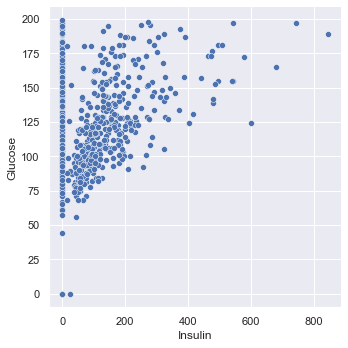

In [27]:
sns.relplot(x='Insulin',y='Glucose',data=df)

In [28]:
# insight 9
df.groupby(['WeightType'])['Outcome'].value_counts()

WeightType    Outcome
NormalWeight  0           95
              1            7
Obese         0          253
              1          219
OverWeight    0          139
              1           40
UnderWeight   0           13
              1            2
Name: Outcome, dtype: int64

In [29]:
# insight 9
df.groupby(['WeightType'])['Pregnancies'].value_counts()

WeightType    Pregnancies
NormalWeight  1              25
              2              16
              3              14
              0              13
              6               9
              4               7
              8               5
              9               4
              5               3
              7               2
              10              2
              12              1
              13              1
Obese         0              79
              1              72
              2              54
              3              45
              4              41
              5              38
              7              31
              6              26
              8              24
              9              21
              10             14
              11             10
              13              8
              12              5
              14              2
              15              1
              17              1
OverWeight    

In [30]:
# insight 10
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [31]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'WeightType'],
      dtype='object')

In [32]:
df['DiabetesPedigreeFunction'].max()

2.42

In [33]:
df['DiabetesPedigreeFunction'].min()

0.078

In [34]:
df.iloc[np.where(df['DiabetesPedigreeFunction']==2.42)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,WeightType
445,0,180,78,63,14,59.4,2.42,25,1,Obese


In [35]:
df.iloc[445]

Pregnancies                     0
Glucose                       180
BloodPressure                  78
SkinThickness                  63
Insulin                        14
BMI                          59.4
DiabetesPedigreeFunction     2.42
Age                            25
Outcome                         1
WeightType                  Obese
Name: 445, dtype: object

<AxesSubplot:xlabel='BMI', ylabel='DiabetesPedigreeFunction'>

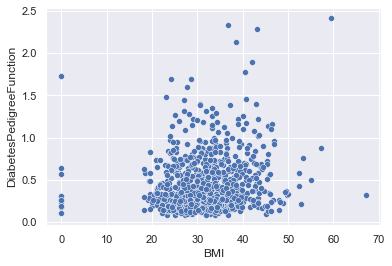

In [36]:
sns.scatterplot(x='BMI',y='DiabetesPedigreeFunction',data=df)

In [37]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,WeightType
0,6,148,72,35,0,33.6,0.627,50,1,Obese
1,1,85,66,29,0,26.6,0.351,31,0,OverWeight
2,8,183,64,0,0,23.3,0.672,32,1,NormalWeight
3,1,89,66,23,94,28.1,0.167,21,0,OverWeight
4,0,137,40,35,168,43.1,2.288,33,1,Obese
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,Obese
764,2,122,70,27,0,36.8,0.340,27,0,Obese
765,5,121,72,23,112,26.2,0.245,30,0,OverWeight
766,1,126,60,0,0,30.1,0.349,47,1,Obese


In [38]:
z=df.iloc[np.where((df['WeightType']=='Obese')&(df['Outcome']==1))]

In [39]:
z=z.iloc[np.where(z['Age']<=30)]

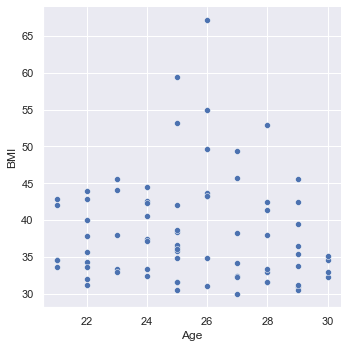

In [40]:
sns.relplot(x='Age',y='BMI',data=z)

In [41]:
# Diabetes Patients with 0 BloodPressure and 0 ammount of insulin Produced 
# in their body

df.iloc[np.where((df['BloodPressure']==0)& (df['Outcome']==1))]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,WeightType
15,7,100,0,0,0,30.0,0.484,32,1,Obese
78,0,131,0,0,0,43.2,0.270,26,1,Obese
193,11,135,0,0,0,52.3,0.578,40,1,Obese
261,3,141,0,0,0,30.0,0.761,27,1,Obese
266,0,138,0,0,0,36.3,0.933,25,1,Obese
269,2,146,0,0,0,27.5,0.240,28,1,OverWeight
300,0,167,0,0,0,32.3,0.839,30,1,Obese
332,1,180,0,0,0,43.3,0.282,41,1,Obese
357,13,129,0,30,0,39.9,0.569,44,1,Obese
435,0,141,0,0,0,42.4,0.205,29,1,Obese


In [42]:
# For normal people Skin Thickness can't be less than 10mm
# that means people in data given below is some kind  of abnormal

df.iloc[np.where(df['SkinThickness']<=10)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,WeightType
2,8,183,64,0,0,23.3,0.672,32,1,NormalWeight
5,5,116,74,0,0,25.6,0.201,30,0,OverWeight
7,10,115,0,0,0,35.3,0.134,29,0,Obese
9,8,125,96,0,0,0.0,0.232,54,1,UnderWeight
10,4,110,92,0,0,37.6,0.191,30,0,Obese
...,...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1,Obese
758,1,106,76,0,0,37.5,0.197,26,0,Obese
759,6,190,92,0,0,35.5,0.278,66,1,Obese
762,9,89,62,0,0,22.5,0.142,33,0,NormalWeight


In [43]:
# BMI can't be 0.Because 0 means the person is really underweight and that is a life 
# threatning condition for the patient
w=df.iloc[np.where(df['BMI']==0)]
w.groupby(['BMI'])['Age'].value_counts()
w.iloc[np.where(w['Outcome']==1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,WeightType
9,8,125,96,0,0,0.0,0.232,54,1,UnderWeight
706,10,115,0,0,0,0.0,0.261,30,1,UnderWeight


In [44]:
w.groupby(['BMI'])['Age'].value_counts()

BMI  Age
0.0  21     3
     22     2
     24     1
     25     1
     26     1
     30     1
     54     1
     69     1
Name: Age, dtype: int64

In [45]:
c=w.groupby(['BMI'])['Age'].value_counts()


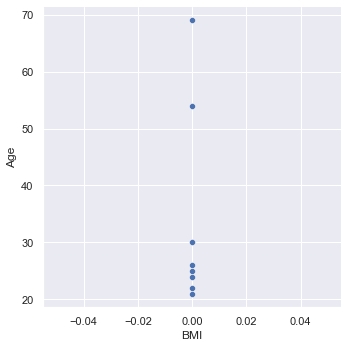

In [46]:
sns.relplot(x='BMI',y='Age',data=c)

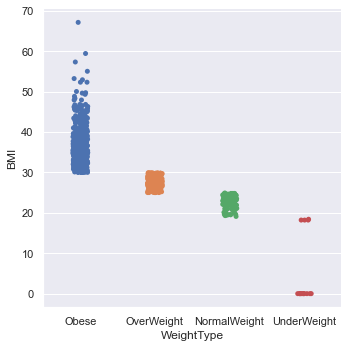

In [47]:
sns.catplot(x='WeightType',y='BMI',data=df)

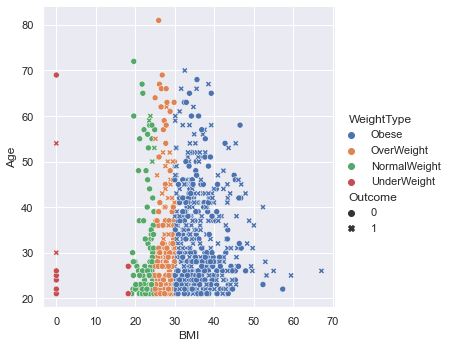

In [48]:
# Overall Review Type
sns.set(style='darkgrid')
sns.relplot(x='BMI',y='Age',data=df,hue='WeightType',style='Outcome')

In [49]:
np.where(df['BMI']==0)

(array([  9,  49,  60,  81, 145, 371, 426, 494, 522, 684, 706], dtype=int64),)

In [50]:
print(df['Insulin'].min())
df['Insulin'].max()


0


846

In [51]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [52]:
df['Insulin'].median()

30.5

(array([487., 155.,  70.,  30.,   8.,   9.,   5.,   1.,   2.,   1.]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <BarContainer object of 10 artists>)

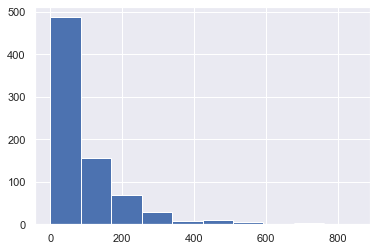

In [53]:
plt.hist(df['Insulin'])

In [54]:
# Patients with Diabetes having Insulin Produced more than 400.
f=df.iloc[np.where((df['Insulin']>400)& (df['Outcome']==1))]
f

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,WeightType
8,2,197,70,45,543,30.5,0.158,53,1,Obese
13,1,189,60,23,846,30.1,0.398,59,1,Obese
111,8,155,62,26,495,34.0,0.543,46,1,Obese
186,8,181,68,36,495,30.1,0.615,60,1,Obese
220,0,177,60,29,478,34.6,1.072,21,1,Obese
370,3,173,82,48,465,38.4,2.137,25,1,Obese
409,1,172,68,49,579,42.4,0.702,28,1,Obese
415,3,173,84,33,474,35.7,0.258,22,1,Obese
584,8,124,76,24,600,28.7,0.687,52,1,OverWeight
655,2,155,52,27,540,38.7,0.240,25,1,Obese


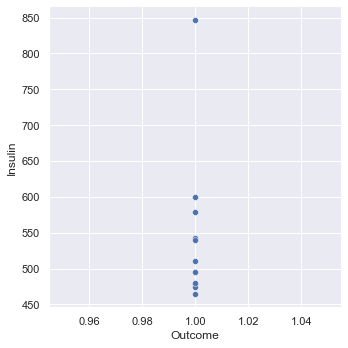

In [55]:
sns.relplot(x='Outcome',y='Insulin',data=f)

In [56]:
# Patients with Type 1 Diabetes
k=df.iloc[np.where((df['Insulin']<=100)&(df['Outcome']==1))]
k       

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,WeightType
0,6,148,72,35,0,33.6,0.627,50,1,Obese
2,8,183,64,0,0,23.3,0.672,32,1,NormalWeight
6,3,78,50,32,88,31.0,0.248,26,1,Obese
9,8,125,96,0,0,0.0,0.232,54,1,UnderWeight
11,10,168,74,0,0,38.0,0.537,34,1,Obese
...,...,...,...,...,...,...,...,...,...,...
754,8,154,78,32,0,32.4,0.443,45,1,Obese
757,0,123,72,0,0,36.3,0.258,52,1,Obese
759,6,190,92,0,0,35.5,0.278,66,1,Obese
761,9,170,74,31,0,44.0,0.403,43,1,Obese


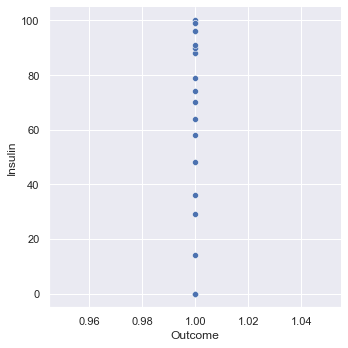

In [57]:
sns.relplot(x='Outcome',y='Insulin',data=k)

In [58]:
# These are suffering from Hyperglycemia because there glucose level 
# is high and insulin level is low.
df.iloc[np.where((df['Glucose']>=140)&(df['Insulin']<100))]   

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,WeightType
0,6,148,72,35,0,33.6,0.627,50,1,Obese
2,8,183,64,0,0,23.3,0.672,32,1,NormalWeight
11,10,168,74,0,0,38.0,0.537,34,1,Obese
22,7,196,90,0,0,39.8,0.451,41,1,Obese
26,7,147,76,0,0,39.4,0.257,43,1,Obese
...,...,...,...,...,...,...,...,...,...,...
746,1,147,94,41,0,49.3,0.358,27,1,Obese
749,6,162,62,0,0,24.3,0.178,50,1,NormalWeight
754,8,154,78,32,0,32.4,0.443,45,1,Obese
759,6,190,92,0,0,35.5,0.278,66,1,Obese


In [59]:
# These are at border of type2 diabetes and cardiovascular diseases because 
# there glucose level and insulin level both are high.
df.iloc[np.where((df['Glucose']>=140)&(df['Insulin']>200)&(df['Outcome']==0))]   

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,WeightType
54,7,150,66,42,342,34.7,0.718,42,0,Obese
95,6,144,72,27,228,33.9,0.255,40,0,Obese
144,4,154,62,31,284,32.8,0.237,23,0,Obese
153,1,153,82,42,485,40.6,0.687,23,0,Obese
228,4,197,70,39,744,36.7,2.329,31,0,Obese
247,0,165,90,33,680,52.3,0.427,23,0,Obese
258,1,193,50,16,375,25.9,0.655,24,0,OverWeight
286,5,155,84,44,545,38.7,0.619,34,0,Obese
335,0,165,76,43,255,47.9,0.259,26,0,Obese
364,4,147,74,25,293,34.9,0.385,30,0,Obese


- In this given dataset, we haven't been informed, whether the values of glucose values has been recorded before meal or afer meal .

- In this dataset "Insulin" column is not defining us about the insuline level is that Fasting reading or 30 minutes or 1 hour after glucose readings etc.

- In the given Isnulin columns having 0  as value and the columns 'Outcome' having 0 as value is not possible because a person with 0 insulin amount can't be normal and it only happens when a person with suffering from diabetes Type 1.

- Type 1 diabetes known as insulin-dependent diabetes, is a chronic condition in which the pancreas produces little or no insulin. Insulin is a hormone needed to allow sugar (glucose) to enter cells to produce energy.

- Type 2 Diabetes is a disease marked by high glucose levels in the blood and impaired metabolism of carbohydrates, fats, and proteins, caused by the body's inability to respond effectively to insulin, combined with inadequate production of insulin by the pancreas.

- These Analysis are based on best of knowledge I got from this Dataset.

In [60]:
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest

In [61]:
popmean=120.89
samplmean=125.37
std=31.36
n=40
alpha=0.05


In [62]:
df['Glucose'].mean()

120.89453125

In [63]:
x=df['Glucose'][0:40]
x.mean()


125.375

In [64]:
x.std()

31.36034365000093

In [65]:
zvalue,pvalue=ztest(x,value=135,alternative='two-sided')
print(round(pvalue,2))
print(zvalue)
if(pvalue<0.05):
    print('reject null hupothesis')
else:
    print('accept null hypothesis')

0.05
-1.9411089890349302
accept null hypothesis


In [66]:
#popmean=69.10
#samplemean=69.32
#std=22.91
#no of samples=34

In [67]:
df['BloodPressure'].mean()# 

69.10546875

In [68]:
xx=df['BloodPressure'][0:34]
xx.mean()

69.32352941176471

In [69]:
xx.std()

22.91581508707839

In [70]:
zvalue,pvalue=ztest(df['BloodPressure'][0:34],value=70,alternative='larger')
print(round(pvalue,2))
print(zvalue)
if(pvalue<0.05):
    print('reject null hupothesis')
else:
    print('accept null hypothesis')

0.57
-0.1721286126323239
accept null hypothesis


In [71]:
(69.3-69.1)/(22.9/np.sqrt(34))

0.050925344059785015

In [72]:
df['Age'].mean()

33.240885416666664

In [73]:
z=df['Age'][0:39]
z.mean()

37.743589743589745

In [74]:
z.std()

11.401103244672488

In [75]:
zvalue,pvalue=ztest(df['Age'][0:39],value=33,alternative='smaller')
print(round(pvalue,2))
print(zvalue)
if(pvalue<0.05):
    print('reject null hupothesis')
else:
    print('accept null hypothesis')

1.0
2.5983194624418213
accept null hypothesis


In [76]:
from scipy.stats import ttest_1samp

In [77]:
df['Glucose'].mean()

120.89453125

In [78]:
tvalue,pvalue=ttest_1samp(df['Glucose'][0:24],146)

In [79]:
print(tvalue)
print(pvalue)

-2.153774290520235
0.04197477236479604


In [80]:
if(pvalue>0.05):
    print('we are accepting null hypothesis')
else:
    print('we are rejecting null hypothesis')

we are rejecting null hypothesis


In [81]:
df['Age'].mean()

33.240885416666664

In [82]:
tvalue,pvalue=ttest_1samp(df['Age'][0:19],50)

In [83]:
print(tvalue)
print(pvalue)

-4.516167317531525
0.00026729840156748127


In [84]:
if(pvalue>0.05):
    print('we are accepting null hypothesis')
else:
    print('we are rejecting null hypothesis')

we are rejecting null hypothesis


In [85]:
tvalue,pvlue=stats.ttest_rel(df['Glucose'],df['BloodPressure'])

In [86]:
print(tvalue)
print(pvalue)


41.293256998612904
0.00026729840156748127


In [87]:
if(pvalue>0.05):
    print('we are accepting null hypothesis')
else:
    print('we are rejecting null hypothesis')

we are rejecting null hypothesis


#  Z-Test

In [88]:
df['Pregnancies'][0:33].mean()

5.303030303030303

In [89]:
df['Pregnancies'].mean()

3.8450520833333335

In [90]:
df['Pregnancies'].std()

3.3695780626988623

In [91]:
zvalue,pvalue=ztest(df['Pregnancies'][0:33],value=3.8,alternative='larger')

In [92]:
print(zvalue)
print(pvalue)

2.3582312422009357
0.00918112531377862


In [93]:
if(pvalue>0.05):
    print('we are accepting null hypothesis')
else:
    print('we are rejecting null hypothesis')

we are rejecting null hypothesis


In [94]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'WeightType'],
      dtype='object')

In [95]:
dt=pd.crosstab(df['BMI'],df['WeightType'])
dt

WeightType,NormalWeight,Obese,OverWeight,UnderWeight
BMI,,,,
0.0,0,0,0,11
18.2,0,0,0,3
18.4,0,0,0,1
19.1,1,0,0,0
19.3,1,0,0,0
...,...,...,...,...
53.2,0,1,0,0
55.0,0,1,0,0
57.3,0,1,0,0


((array([-3.12069362e+00, -2.84945435e+00, -2.69768447e+00, -2.59044160e+00,
         -2.50664754e+00, -2.43745274e+00, -2.37827016e+00, -2.32640403e+00,
         -2.28013073e+00, -2.23827901e+00, -2.20001550e+00, -2.16472534e+00,
         -2.13194152e+00, -2.10130063e+00, -2.07251420e+00, -2.04534920e+00,
         -2.01961466e+00, -1.99515202e+00, -1.97182811e+00, -1.94953002e+00,
         -1.92816110e+00, -1.90763799e+00, -1.88788828e+00, -1.86884861e+00,
         -1.85046325e+00, -1.83268292e+00, -1.81546377e+00, -1.79876666e+00,
         -1.78255649e+00, -1.76680162e+00, -1.75147347e+00, -1.73654612e+00,
         -1.72199598e+00, -1.70780152e+00, -1.69394305e+00, -1.68040247e+00,
         -1.66716316e+00, -1.65420979e+00, -1.64152817e+00, -1.62910519e+00,
         -1.61692865e+00, -1.60498724e+00, -1.59327041e+00, -1.58176831e+00,
         -1.57047175e+00, -1.55937212e+00, -1.54846135e+00, -1.53773186e+00,
         -1.52717653e+00, -1.51678867e+00, -1.50656194e+00, -1.49649040e+00,

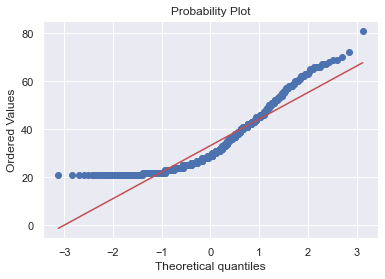

In [96]:
stats.probplot(df['Age'],dist='norm',plot=pylab)

C:\Users\yashw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WeightType', ylabel='count'>

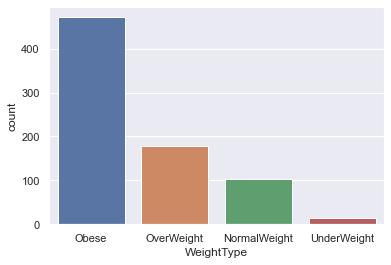

In [97]:
sns.countplot(df['WeightType'])

In [98]:
# for two sample test.
zvalue1,pvalue1=ztest(df['Glucose'][0:40],df['Pregnancies'][0:40],value=151,alternative='two-sided')
print(round(pvalue1,2))
print(zvalue1)
if(pvalue1<0.05):
    print('reject null hupothesis')
else:
    print('accept null hypothesis')

0.0
-6.240782666111064
reject null hupothesis


In [99]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'WeightType'],
      dtype='object')

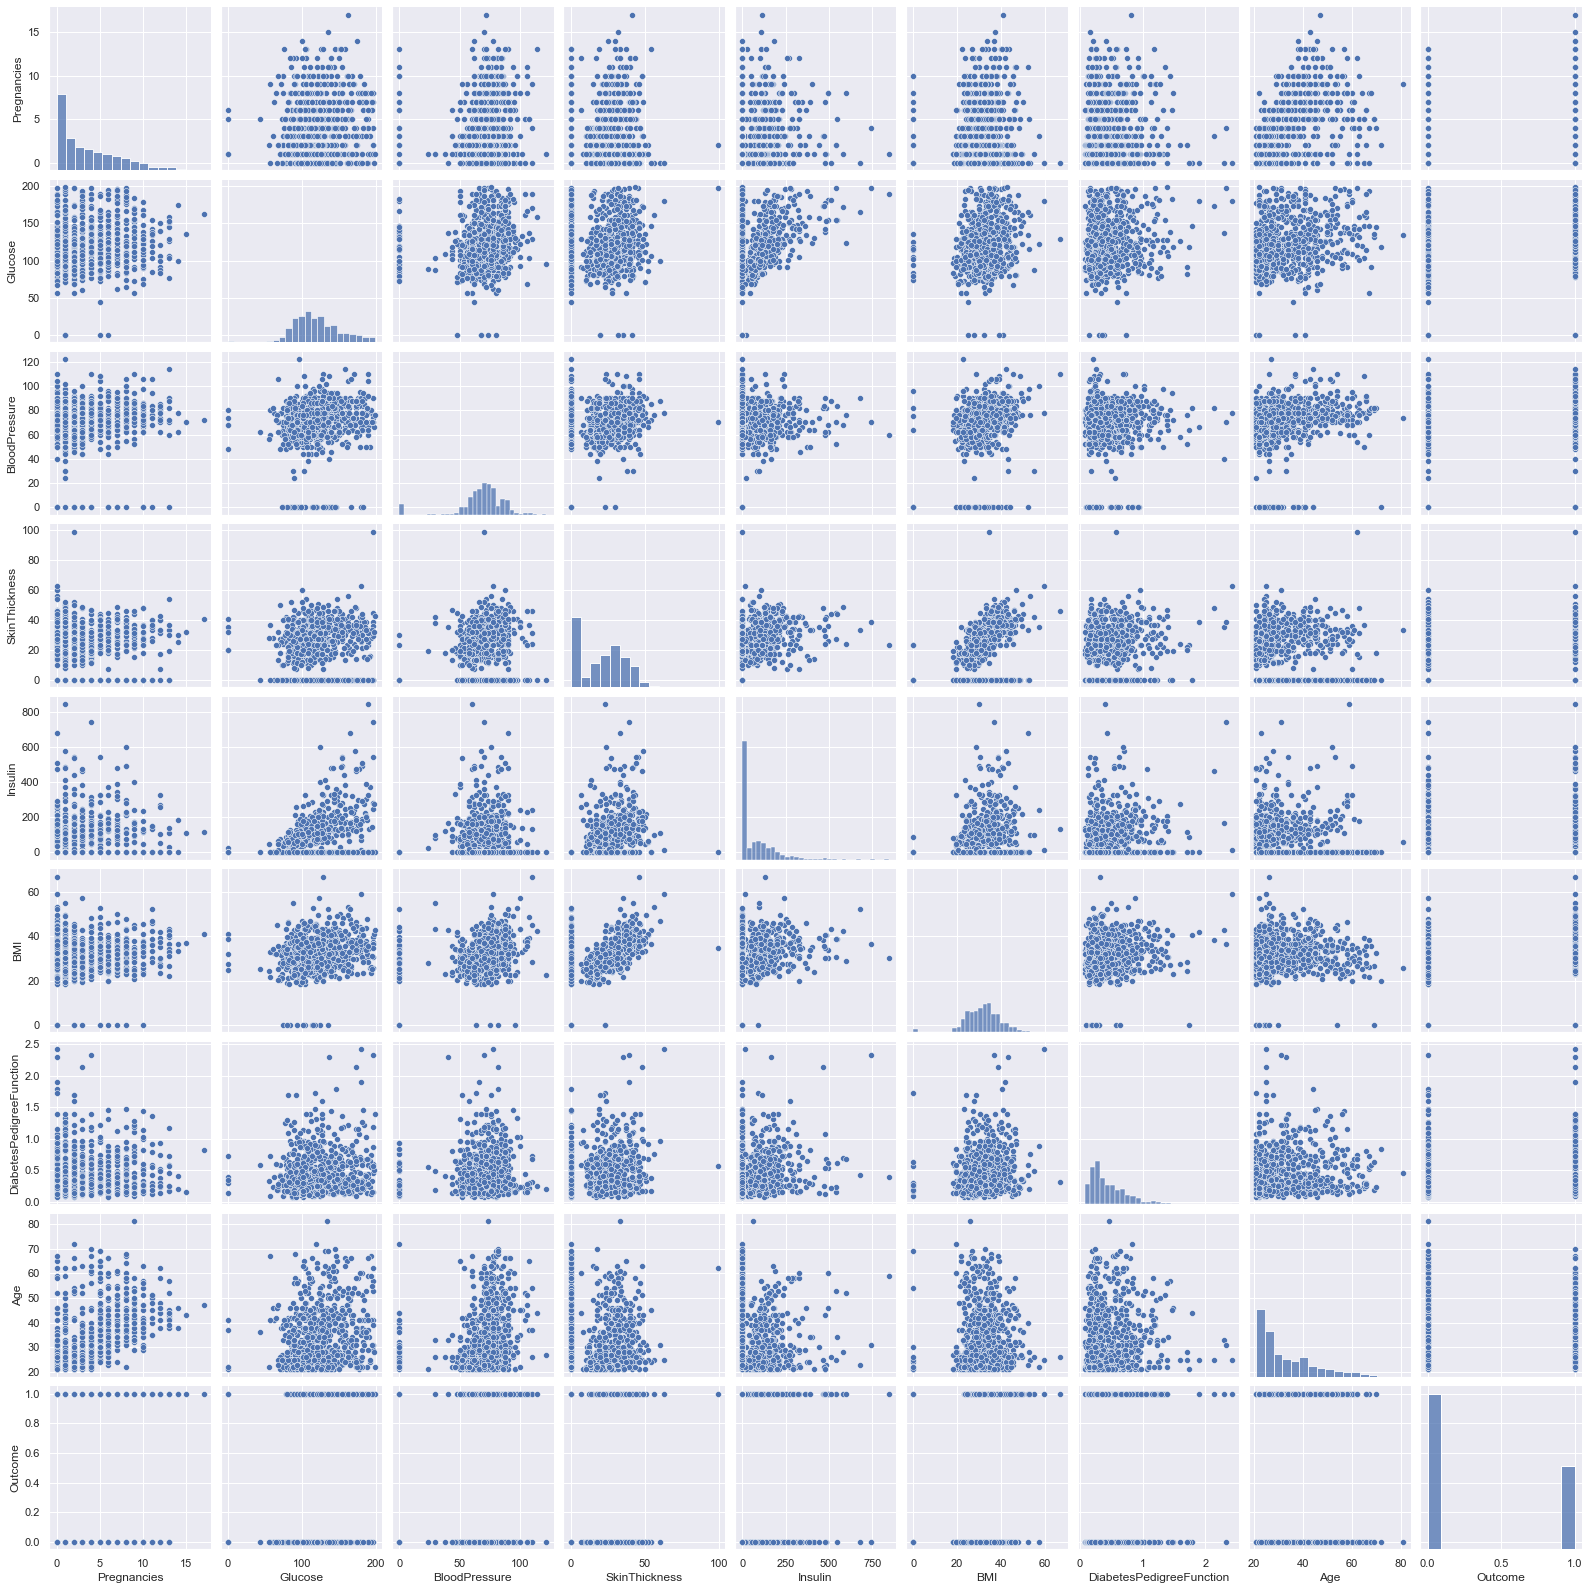

In [100]:
sns.pairplot(df)

In [101]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

<AxesSubplot:>

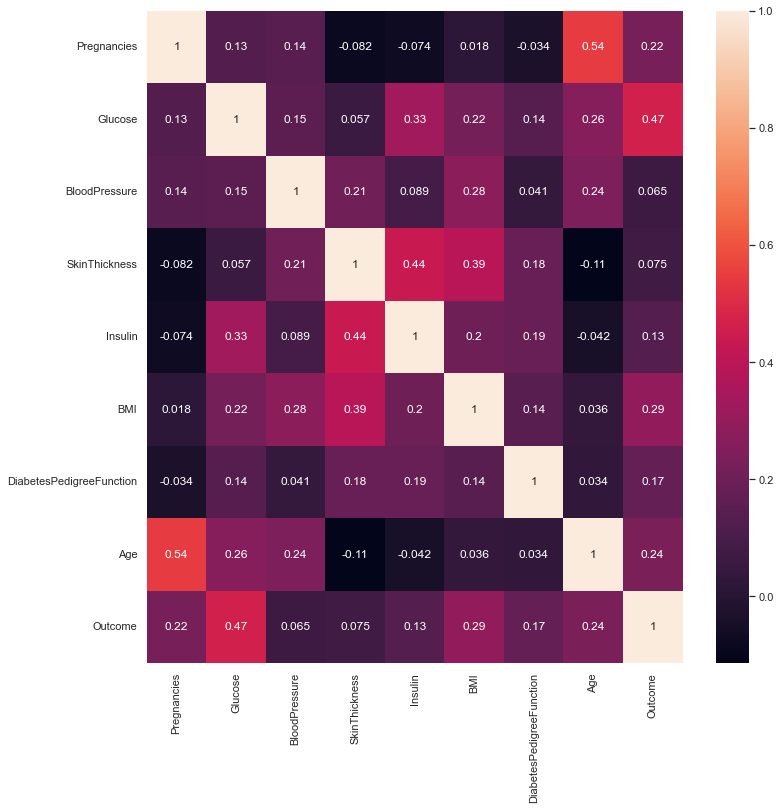

In [102]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

In [103]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'WeightType'],
      dtype='object')

In [104]:
df.drop(columns='WeightType')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [105]:
df['Insulin'].median()

30.5

In [106]:
df[df['Insulin']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,WeightType
0,6,148,72,35,0,33.6,0.627,50,1,Obese
1,1,85,66,29,0,26.6,0.351,31,0,OverWeight
2,8,183,64,0,0,23.3,0.672,32,1,NormalWeight
5,5,116,74,0,0,25.6,0.201,30,0,OverWeight
7,10,115,0,0,0,35.3,0.134,29,0,Obese
...,...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1,Obese
762,9,89,62,0,0,22.5,0.142,33,0,NormalWeight
764,2,122,70,27,0,36.8,0.340,27,0,Obese
766,1,126,60,0,0,30.1,0.349,47,1,Obese


In [107]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'WeightType'],
      dtype='object')

In [108]:
df=df.drop(columns='WeightType')

In [114]:
from collections import Counter

In [118]:
from imblearn.over_sampling import RandomOverSampler

rus = RandomOverSampler(random_state=42)
x_rus, y_rus = rus.fit_resample(X, Y)


print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_rus))

Original dataset shape Counter({0: 500, 1: 268})
Resample dataset shape Counter({1: 500, 0: 500})


In [119]:
X=df.drop(columns='Outcome')
Y=df['Outcome']

In [120]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [111]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [125]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

x_smote, y_smote = smote.fit_resample(X, Y)

print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_smote))



scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_rus)

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_rus,test_size=0.25,random_state=0)

lm= LogisticRegression()
lm.fit(x_train,y_train)

Original dataset shape Counter({0: 500, 1: 268})
Resample dataset shape Counter({1: 500, 0: 500})


LogisticRegression()

In [126]:
y_pred=lm.predict(x_test)

In [127]:
y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [128]:
accuracy_score(y_test,y_pred)

0.784

In [129]:
confusion_matrix(y_test,y_pred)

array([[98, 28],
       [26, 98]], dtype=int64)

In [130]:
 auc=roc_auc_score(y_test,y_pred)

In [131]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

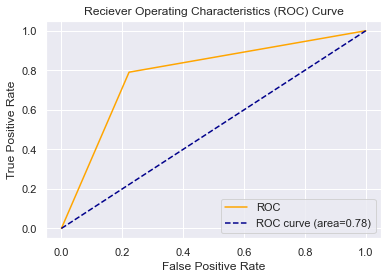

In [132]:
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristics (ROC) Curve')
plt.legend()
plt.show()

## Applying Decision Tree Classifier

In [ ]:
df.info()

In [134]:
df=df.drop(columns='WeightType')

KeyError: "['WeightType'] not found in axis"

In [143]:
X=df.drop(columns='Outcome')
Y=df['Outcome']

In [144]:
from imblearn.over_sampling import RandomOverSampler

rus = RandomOverSampler(random_state=42)
x_rus, y_rus = rus.fit_resample(X, Y)


print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_rus))

Original dataset shape Counter({0: 500, 1: 268})
Resample dataset shape Counter({1: 500, 0: 500})


In [145]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

x_smote, y_smote = smote.fit_resample(X, Y)

print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_smote))



scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_rus)

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_rus,test_size=0.25,random_state=0)

lm= LogisticRegression()
lm.fit(x_train,y_train)

Original dataset shape Counter({0: 500, 1: 268})
Resample dataset shape Counter({1: 500, 0: 500})


LogisticRegression()

In [146]:
y_pred=clf.predict(x_test)

C:\Users\yashw\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [147]:
accuracy_score(y_test,y_pred)

0.504

In [148]:
confusion_matrix(y_test,y_pred)

array([[126,   0],
       [124,   0]], dtype=int64)

In [149]:
auc=roc_auc_score(y_test,y_pred)
auc


0.5

In [150]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64